In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('seaborn')

import missingno as msno 

#ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

In [21]:
# 1.Dataset 확인

df_train = pd.read_csv('C:/Users/Lenovo/Desktop/데이터분석/train.csv')
df_test = pd.read_csv('C:/Users/Lenovo/Desktop/데이터분석/test.csv')

In [22]:
df_train.head()
#다루고자 하는 변수: Pclass, Age, Sex, SinSp, Parch, Fare 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_train.describe()
#describe()쓰면 각 feature가 가진 통계치 반환해줌 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


위에 통계치 살펴보면 어떤 feature에서 null data가 있는지 대략적으로 볼 수 있음(Age)

In [35]:
#1. Null Data check 

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print (msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:   Survived	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 19.87%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.00%
column:      Cabin	 Percent of NaN Value: 77.10%
column:   Embarked	 Percent of NaN Value: 0.22%


In [36]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_train[col].shape[0]))
    print (msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 9.65%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.11%
column:      Cabin	 Percent of NaN Value: 36.70%
column:   Embarked	 Percent of NaN Value: 0.00%


이렇게 df를 써도 되지만 msno lib쓰면 더 간단하게 한 눈에 null data 확인 가능

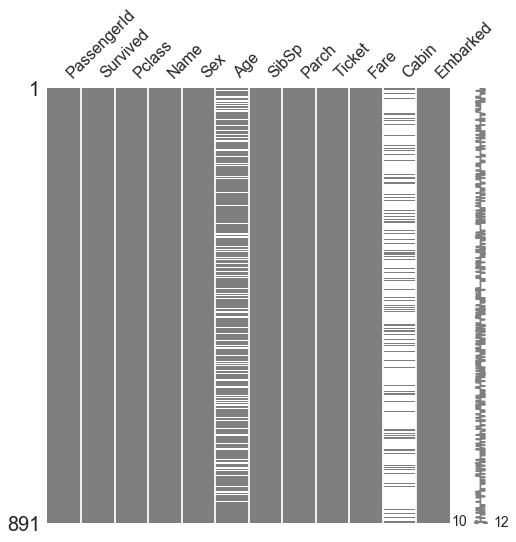

In [39]:
#바코드 형식
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.5,0.5,0.5))
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=(0.5,0.5,0.5))

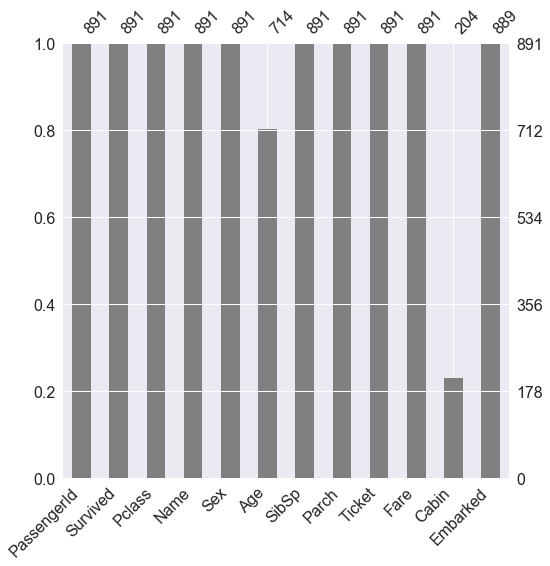

In [46]:
#Bar Graph 
msno.bar(df=df_train.iloc[:,:], figsize=(8,8),color=(0.5,0.5,0.5))

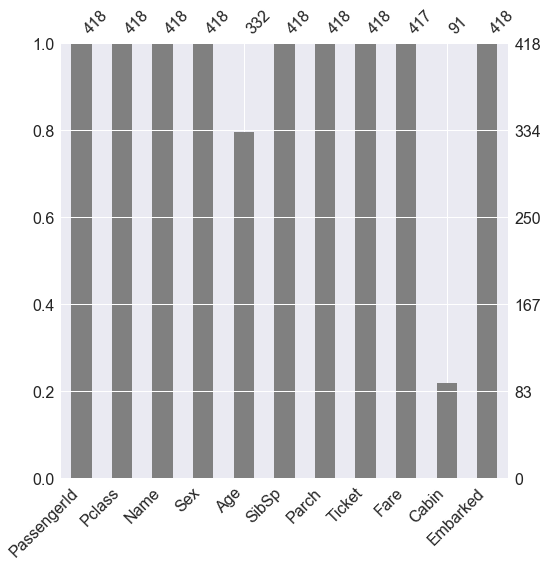

In [45]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8),color=(0.5,0.5,0.5))

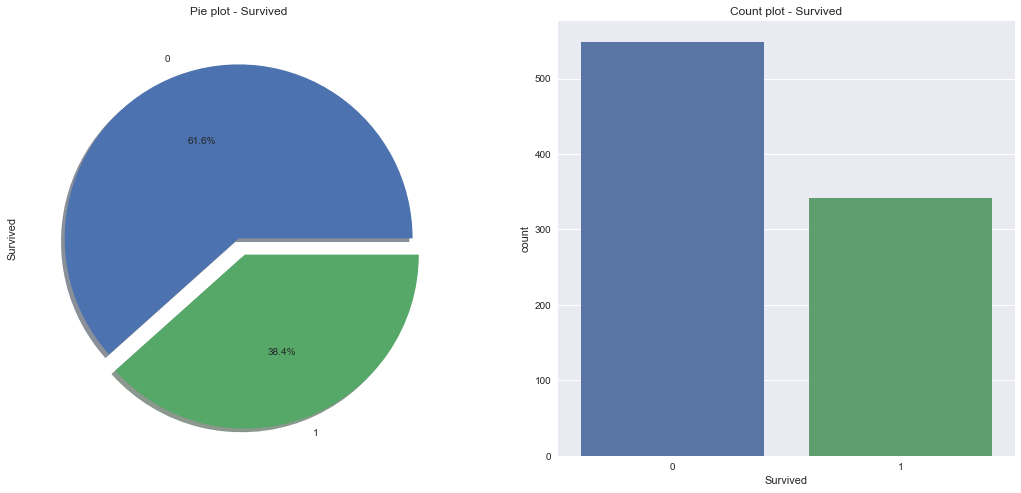

In [48]:
#1.2 Target label 확인 
#이 문제는 binary classification 이므로 1과 0의 분포에 따라 모델 평가 방법이 달라짐
#한쪽이 월등히 과반수 이상이라면 그냥 전부 한 쪽이라고 해도 정확도 50%이상임

f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_label('')

sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

2. Exploratory data analysis 

2.1 P class 
ordinaㅣ, 서수형, 카테고리 데이터로 Pclass에 따른 생존율 차이를 보기 위해서 pandas dataframe의 groupby나 pivot method 사용 
필요한 data는 'Pclass', 'Survived'이고 각 pclass별로 생존률구하면 됨 

In [50]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [62]:
# pandas의 crosstab을 사용하면 더 자세하게 볼 수 있다 
#margins=False하면 0,1값만 보이고 전체sum은 안나옴

pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


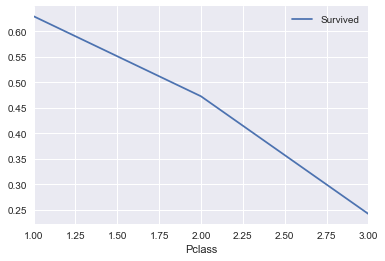

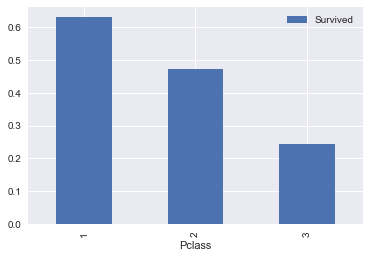

In [61]:
#grouped 객체에 mean()처리해서 각 pclass의 생존률 구하기 
#당연한 얘기지만 Pclass는 카테고리 데이터니까 꺾은선 그래프로 그리면 안됨!!!

df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot()
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

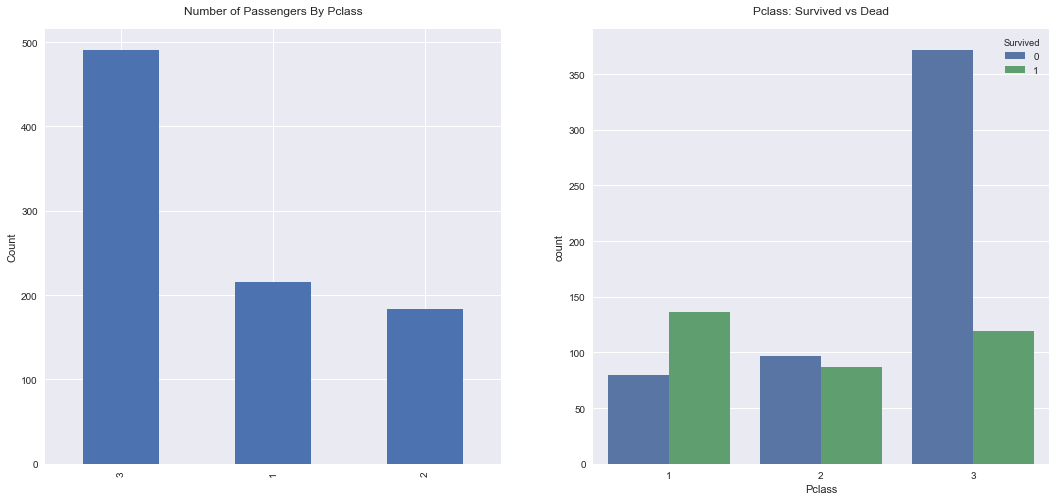

In [64]:
#seaborn을 써서 더 자세하게 그래프 그려주기. sns.countplot 쓰면 특정 label의 수 확인 가능

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

#그래프를 보면 실제 생존자수는 class3에서 많지만 생존률을 따지면 class1이 더 높음

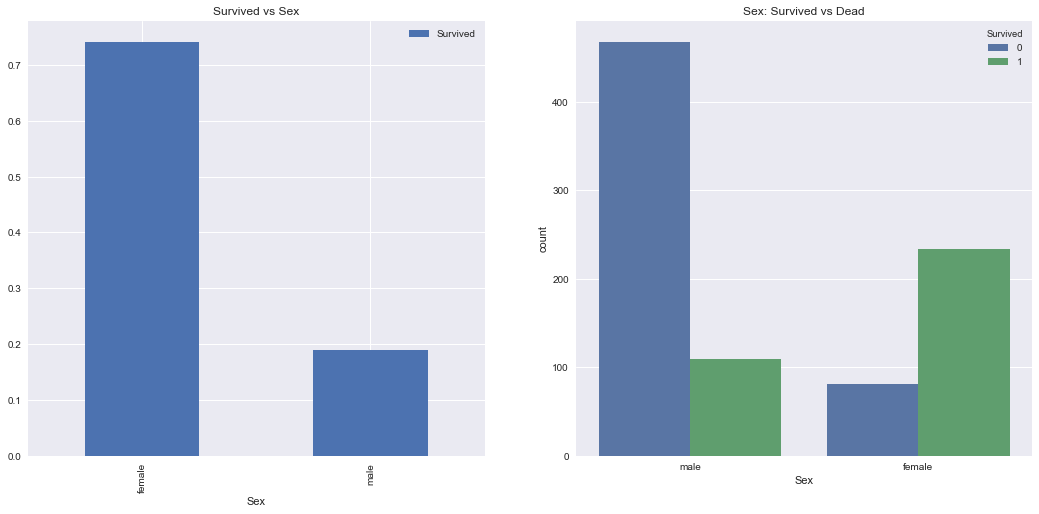

In [65]:
#2.2 Sex 
#Pclass와 동일하게 그래프 그려보기 

f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])

ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


In [66]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [67]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.3 Both Sex and Pclass 
두 가지 변수에 따라 생존률이 어떻게 되는지 보기 
seaborn의 factorplot을 이용하면 3차원의 그래프 그릴 수 있음 

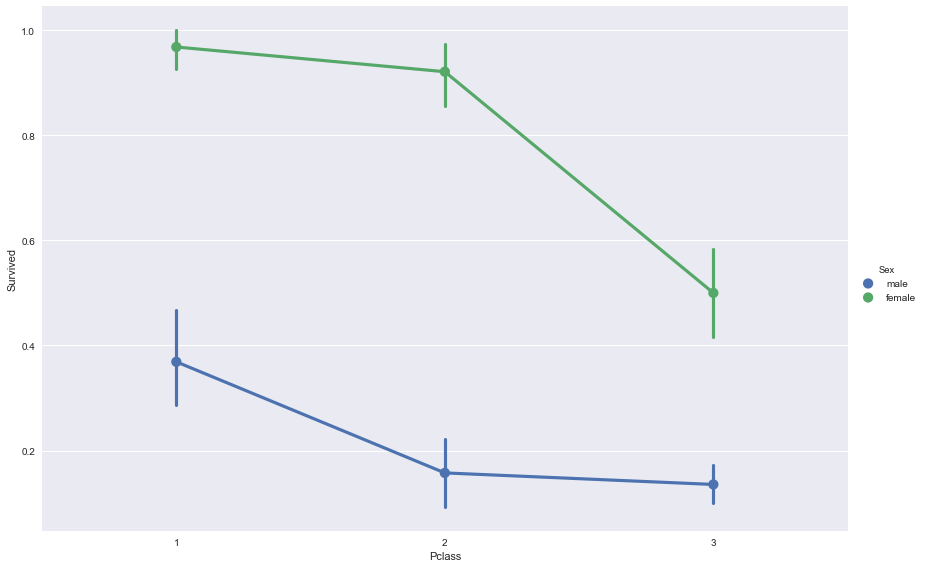

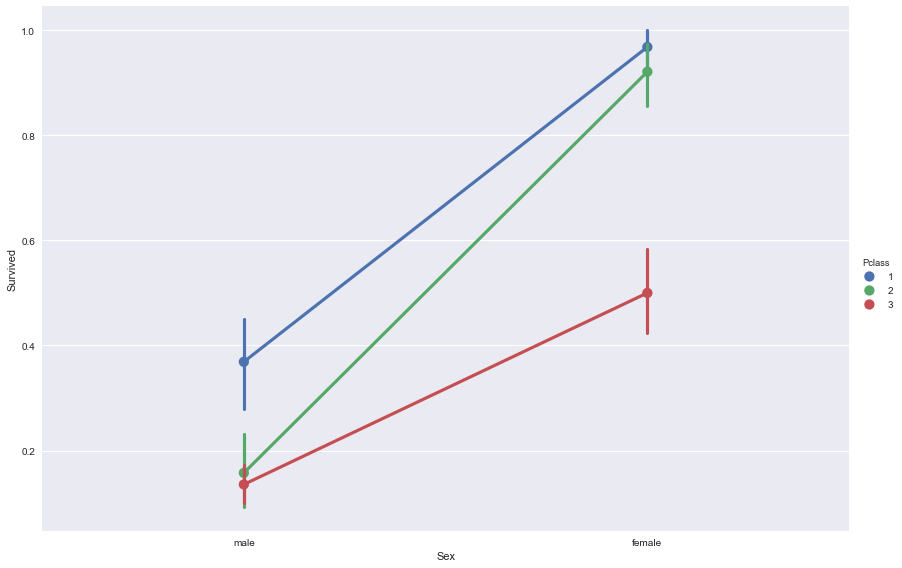

In [72]:
sns.factorplot('Pclass','Survived', hue='Sex',data=df_train, size=8, aspect=1.5)
sns.factorplot('Sex','Survived', hue='Pclass',data=df_train, size=8, aspect=1.5)

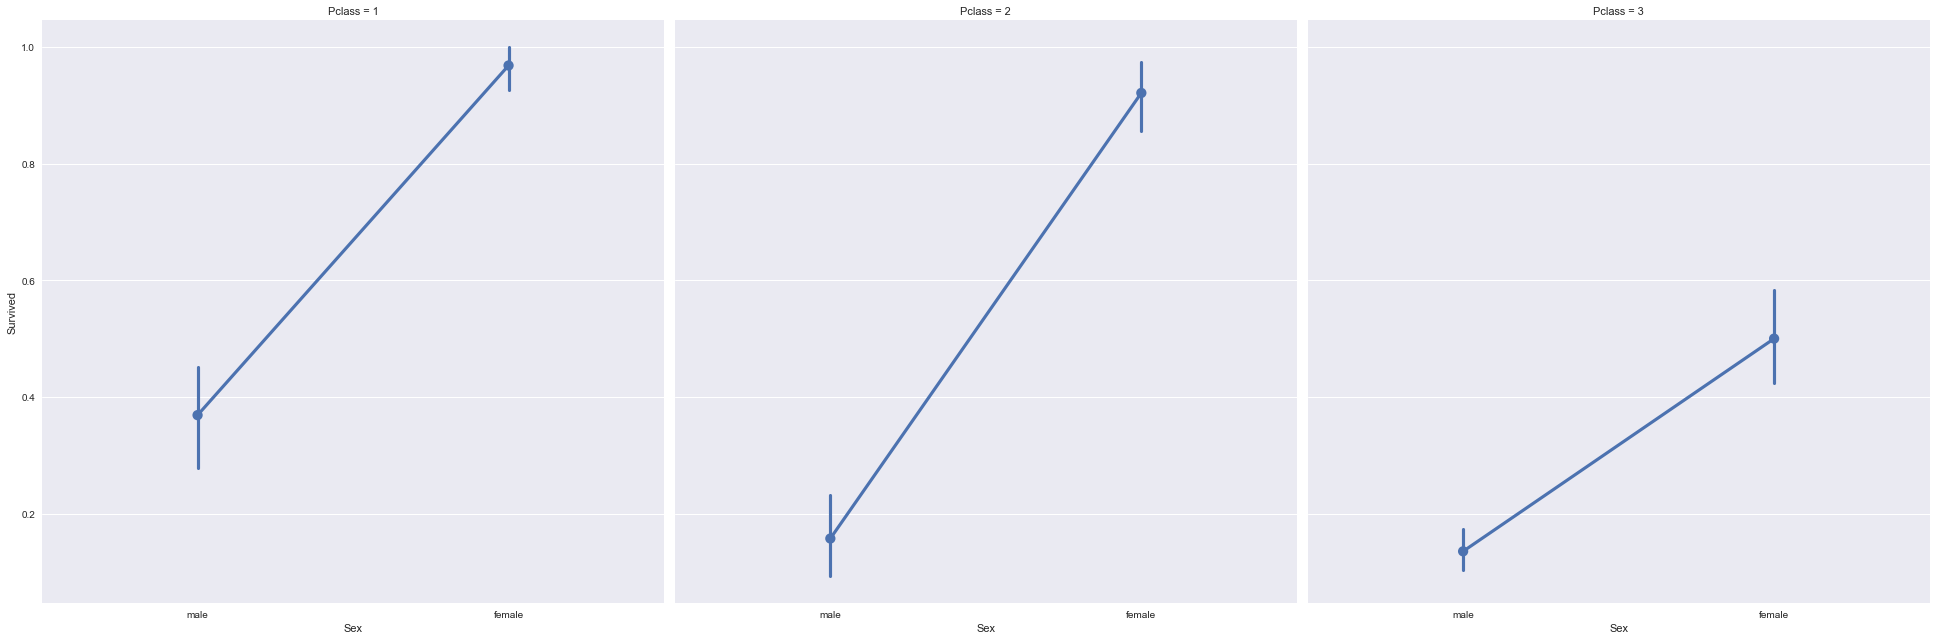

In [73]:
#Pclass에 따라 그래프 따로 그리려면

sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=0.5, size=9, aspect=1)

2.4 Age 
Age에 따른 생존률 살펴보기 

In [74]:
print('제일 나이 많은 탑승객 : {:.1f}Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f}Years'.format(df_train['Age'].min()))
print('탑승객 평균 연령: {:.1f}Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0Years
제일 나이 어린 탑승객 : 0.4Years
탑승객 평균 연령: 29.7Years


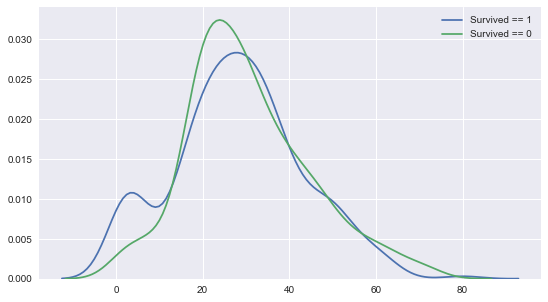

In [75]:
#Age에 따른 histogram그리기 (나이 분포 보기위해서)

f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'],ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

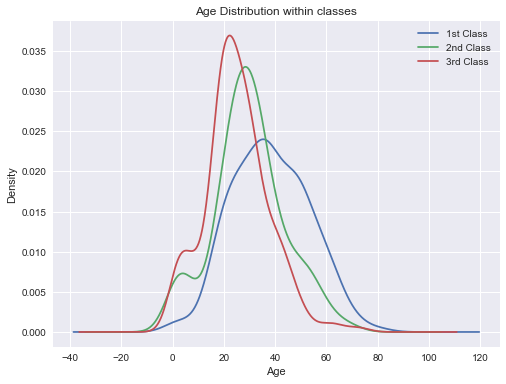

In [76]:
#위 그래프를 통해 생존자 중에는 나이 어린 사람이 많다는 것을 볼 수 있음 
#제대로 된 나이-Pclass 생존자 분포 그려보기 

plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class', '3rd Class'])

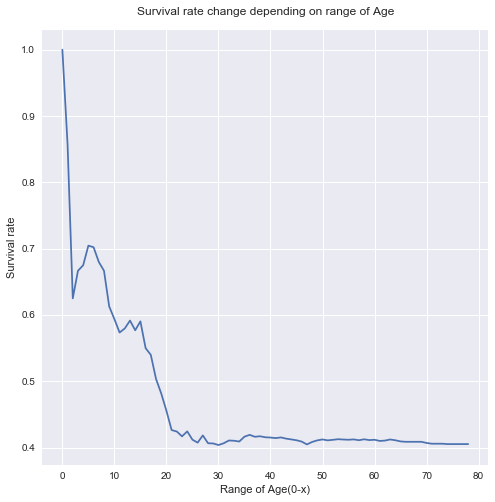

In [78]:
#1class는 나이 많은 사람들의 비중이 높다
#나이대+나이범위에 따른 생존률을 자세하게 살펴보자 

commulate_survival_ratio= []
for i in range(1,80):
    commulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(8,8))
plt.plot(commulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

2.5 Pclass, Sex, Age 
지금까지 본 모든 변수 Pclass, Sex, Age에 따른 생존률 보기 
->> seaborn의 violinplot(인구분포그릴때 자주 쓰는 그 그래프 항아리plot)을 사용하면 쉽게 그릴 수 있음, 이름이 특이하네 
이 때 x축에는 우리가 나누서 보고싶어하는 조건(Pclass, sex)를 넣어주고 y축은 보고 싶은 dist(age)

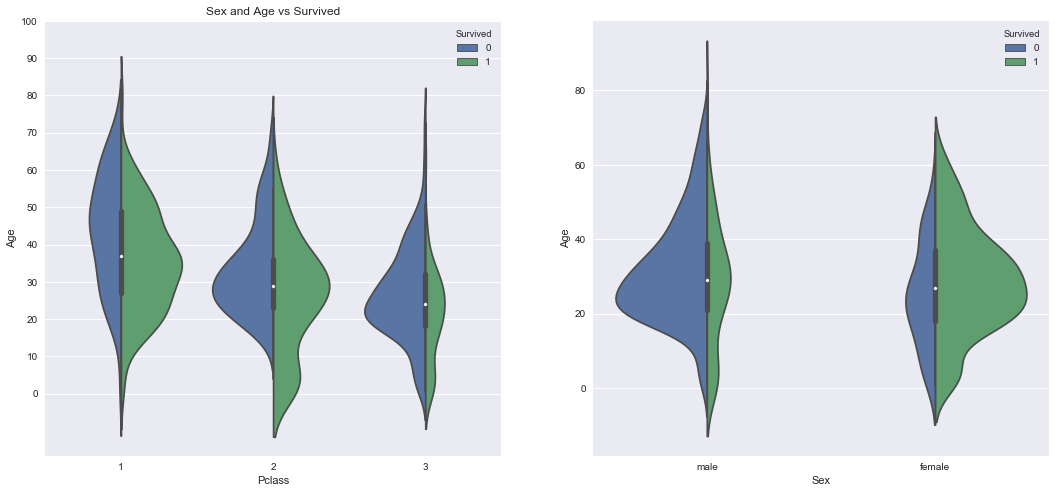

In [82]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

#Pclass,Age - Survived
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#Sex,Age - Survived 
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count',split=True, ax=ax[1])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
plt.show()

2.6  Embarkled(항구) 
위에서 했던 거랑 비슷하게 하면 됨 

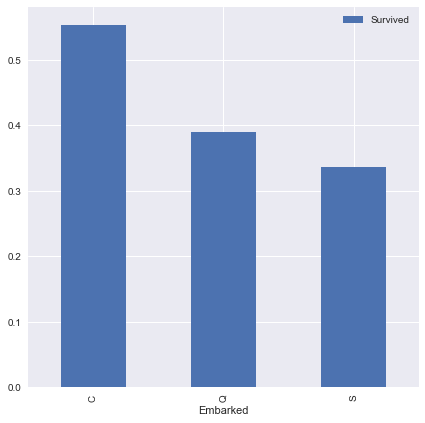

In [83]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

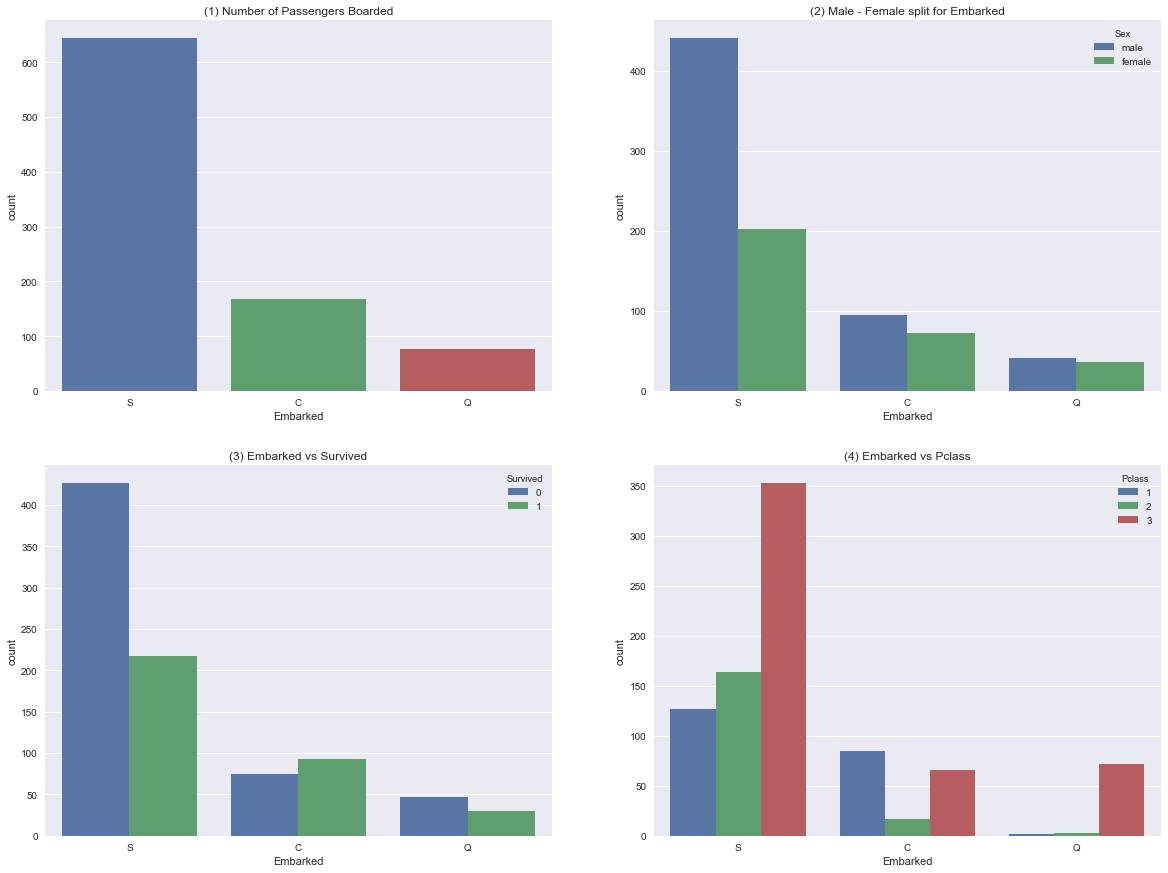

In [88]:
#위에 그래프만 보고는 Embarked가 얼마나 유의미한 영향을 미쳤는지 알 수 없으니 다른 feature와 함께 살펴봐야함 

f, ax = plt.subplots(2, 2, figsize=(20,15))

#1. No of passengers boarded
ax[0,0].set_title('(1) Number of Passengers Boarded')
sns.countplot('Embarked', data=df_train, ax=ax[0,0])

#2. Male - Female split for Embarked 
ax[0,1].set_title('(2) Male - Female split for Embarked')
sns.countplot('Embarked', hue='Sex', data=df_train, ax = ax[0,1])

#3. Embarked vs Survived 
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Survived', data=df_train, ax = ax[1,0])

#4. Embarked vs Sex 
ax[1,1].set_title('(4) Embarked vs Pclass')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax = ax[1,1])


항구 C가 생존율이 높은 건 높은 class 탑승객들이 많기 때문임을 알 수 있음
항구 S는 class3 탑승객들이 많기 때문에 생존률이 떨어짐 
전반적으로 항구S에서 많은 사람들이 탑승했음

그래프1. 항구에 따른 탑승객수 
그래프2. 항구에 따른 탑승객 수를 성별에 따라 split
그래프3. 항구에 따른 탑승객 수를 생존에 따라 split
그래프4. 항구에 때란 탑승객 수를 class에 따라 split 

2.7 Family - SibSp+Parch(형제자매와 부모자녀)
두 가지 변수를 합쳐서 Family로 표현하자 
Family size에 자기자신을 포함해야하니 +1하는 거 놓치지 말기 
test data에도 잊지말고 FamilySize 만들어주기

In [89]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1

In [90]:
print("Max size of Family: ", df_train['FamilySize'].max())
print("Min size of Family: ", df_train['FamilySize'].min())

Max size of Family:  11
Min size of Family:  1


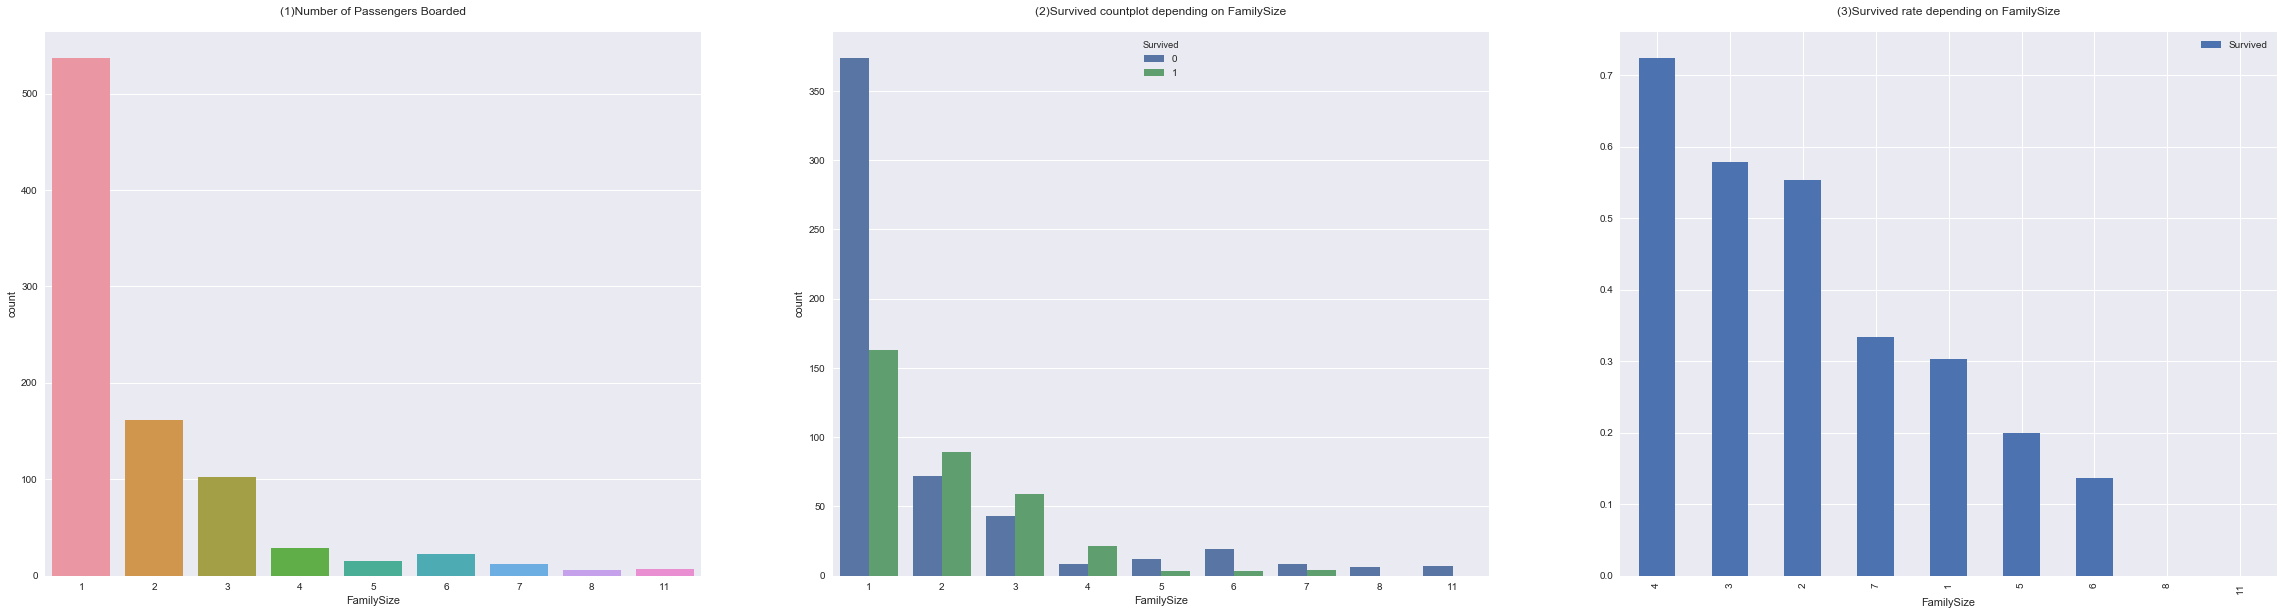

In [99]:
#FamilySize와 생존의 관계보기 

f, ax = plt.subplots(1, 3, figsize=(40,10))

#1. Number of Passengers Boarded
ax[0].set_title('(1)Number of Passengers Boarded',y=1.02)
sns.countplot('FamilySize',data=df_train,ax=ax[0])

#2. Survived countplot depending on FamilySize 
ax[1].set_title('(2)Survived countplot depending on FamilySize',y=1.02)
sns.countplot('FamilySize', hue='Survived', data=df_train,ax=ax[1])

#3. Survived rate depending on FamilySize/ 생존률은 sns.countplot쓰는 게 아님
ax[2].set_title('(3)Survived rate depending on FamilySize',y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


그래프1. FamilySize 분포 막대그래프 
그래프2. FamilySize에 따른 생존자 수를 보여줌(파란색 막대는 사망자수 초록색 막대가 생존자 수) 4명일때가 생존율이 높음
그래프3. FamilySize에 따른 생존률 보여줌, 2에서 본것처럼 4명일때가 생존률이 제일 높음 그 다음으로는 3명 

2.8 Fare 탑승요금
당연히,, class가 높을수록 fare도 높을테니까 비슷하게 따라가지 않을까 
하지만 class와 달리 fare는 연속 데이터라는 점에 유의하며 히스토그램을 그려보자 sns.distplot 사용

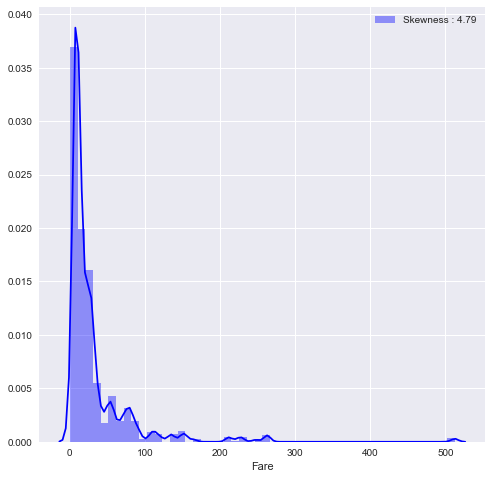

In [101]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

분포가 굉장한 비대칭임 (High skewness)
이러한 데이터를 모델에 넣으면 잘못 학습할 수 있음(outlier에 민감하게 반응)

outlier의 영향을 줄이려면 어떻게할까????? log처리한다 
어떻게 log를 취할까??? 

pandas에서는 dataframe의 특정 column에 공통된 작업(함수)를 적용할 때 map 또는 apply를 써서 쉽게 적용할 수 있음

우리가 지금 운하는 것 ->>> Fare column 값에 모두 log를 취하는 것인데 
파이썬의 lambda함수를 이용해 간단히 로그를 적용하는 함수를 map의 인수로 넣어주면 그대로 Fare column 데이터에 그대로 적용이 됨 

☆매우 중요하고 유용한 스킬임☆

In [102]:
#일단 test에 있는 Fare NaN 값들을 평균값을 바꿔줌.. 그래야 log할 수 있음
df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

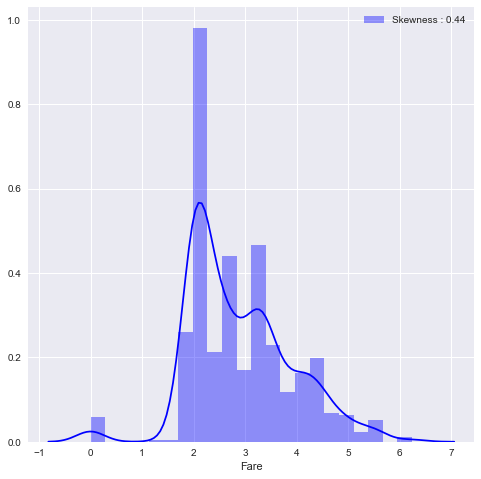

In [103]:
# log처리 해줬으니까 다시 한번 fare의 분포 그래프 그려봄

f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

log처리 해주니까 비대칭성이 많이 나아진 것을 볼 수 있음
이러한 작업을 통해 모델 성능을 향성시킬 수 있다 
이런 작업을 feature engineering 이라고 함
feature engineering: 모델을 학습시키기 위해, 모델의 성능을 높이기 위해 feature들에 여러 조작?? 연산을 가하거나 새로운 feature를 추가하는 것

2.9 Cabin 
아까 null data check할 때 NaN이 80%가량이었던 feature임
중요한 정보빼기 어려움,, 따라서 모델에 포함시키지 않는다 

2.10 Ticket 
이 feature에는 NaN은 없음 
string data 이므로 전처리를 해줘야 모델에 적용할 수 있음 
어떻게 string을 숫자data로 써먹을 수 있을까?? 고민해봐야함 

In [104]:
df_train['Ticket'].value_counts()

1601          7
347082        7
CA. 2343      7
CA 2144       6
3101295       6
             ..
350035        1
230434        1
349228        1
F.C. 12750    1
330877        1
Name: Ticket, Length: 681, dtype: int64